<a href="https://colab.research.google.com/github/Molzard/PCVK-Ganjil-2025/blob/main/Week3_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---


<p align="center">D1. Operasi Citra Sederhana</p>


---



In [3]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pyplot as plt
from math import log10, sqrt

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


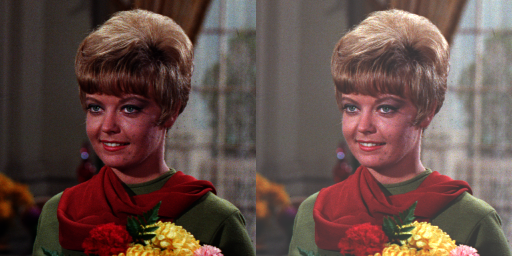

In [ ]:
"""
Transformasi Linier Brightness
"""

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error; not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c].astype(np.int16) + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)



---


<p align="center">Tugas Praktikum D1</p>


---



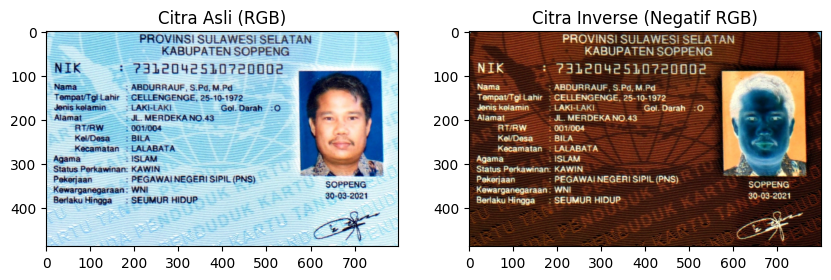

In [ ]:
'''
Implementasikan inverse citra pada Google Colaboratory menggunakan formula
yang terdapat pada bagian Ulasan Teori,
'''

imginvers = cv.imread("/content/drive/MyDrive/PCVK/KTP7.jpeg")
imginvers_rgb = cv.cvtColor(imginvers, cv.COLOR_BGR2RGB)

inverse_img = 255 - imginvers_rgb

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Citra Asli (RGB)")
plt.imshow(imginvers_rgb)

plt.subplot(1,2,2)
plt.title("Citra Inverse (Negatif RGB)")
plt.imshow(inverse_img)

plt.show()

 Mengubah tingkat kecerahan dan kontras citra 
----------------------------------------------
Masukkan nilai kecerahan [-255 - 255]: 50
Masukkan nilai kontras [1.0 - 3.0]: 2


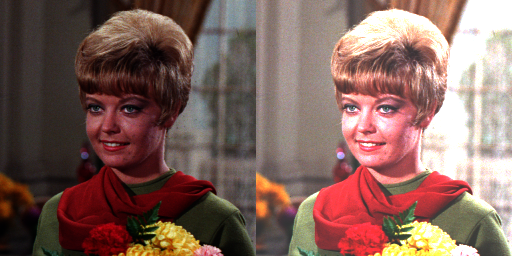

In [ ]:
print(' Mengubah tingkat kecerahan dan kontras citra ')
print('----------------------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan nilai kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error; not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per piksel dengan brightness + contrast
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y, x, c] = np.clip(
          original[y, x, c].astype(np.float32) * contrast + brightness,
          0, 255
      )

brightness_image = brightness_image.astype(np.uint8)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

 Mengubah tingkat kecerahan citra dengan Transformasi Log 
----------------------------------------------------------
Masukkan nilai kecerahan:50


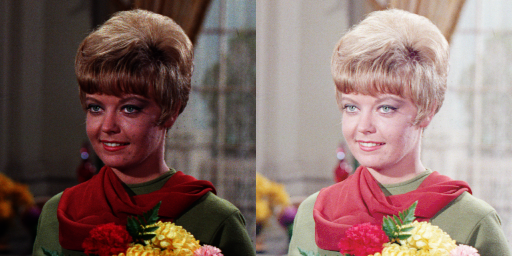

In [ ]:
"""
Transformasi Logarithmic Brightness
"""

print(' Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('----------------------------------------------------------')
try:
    bringhtness= int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
log_transformed_image = np.zeros(original.shape, original.dtype)

# Apply log transformation
c = 255 / np.log(1 + np.max(original))

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c_channel in range(original.shape[2]):
      log_transformed_image[y,x,c_channel] = c * np.log(1 + original[y,x,c_channel])

log_transformed_image = np.array(log_transformed_image, dtype=np.uint8)

final_frame = cv.hconcat((original, log_transformed_image))
cv2_imshow(final_frame)

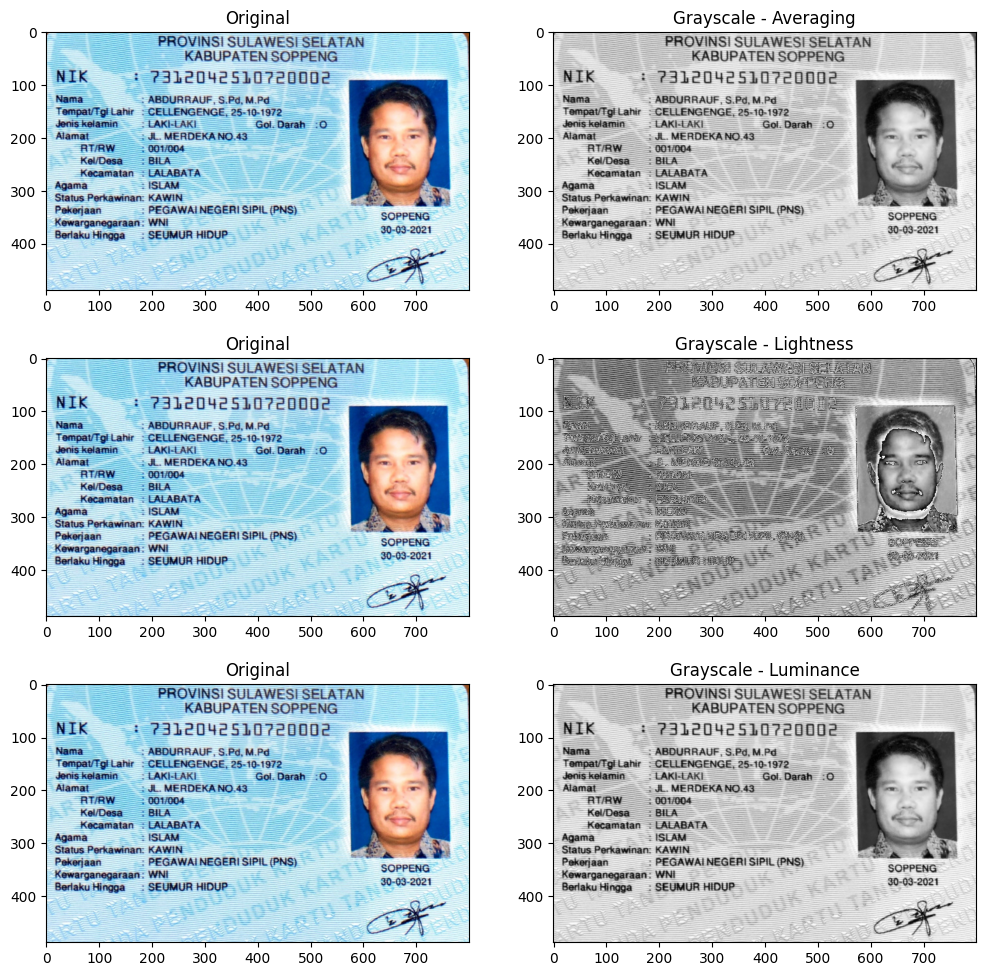

In [ ]:
'''
Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori
'''

img = cv.imread('/content/drive/MyDrive/PCVK/KTP7.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

avg_gray = np.mean(img, axis=2).astype(np.uint8)

light_gray = ((np.max(img, axis=2) + np.min(img, axis=2)) / 2).astype(np.uint8)

lumi_gray = (0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]).astype(np.uint8)

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Averaging
axes[0,0].imshow(img)
axes[0,0].set_title("Original")
axes[0,1].imshow(avg_gray, cmap="gray")
axes[0,1].set_title("Grayscale - Averaging")

# Lightness
axes[1,0].imshow(img)
axes[1,0].set_title("Original")
axes[1,1].imshow(light_gray, cmap="gray")
axes[1,1].set_title("Grayscale - Lightness")

# Luminance
axes[2,0].imshow(img)
axes[2,0].set_title("Original")
axes[2,1].imshow(lumi_gray, cmap="gray")
axes[2,1].set_title("Grayscale - Luminance")

plt.show()

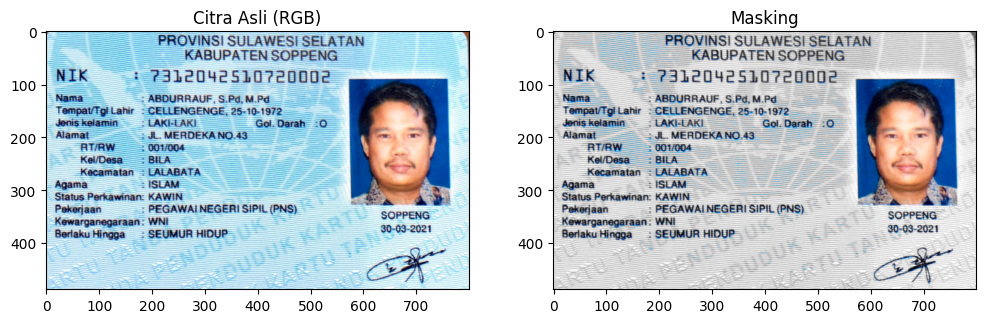

In [ ]:
'''
Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale.
Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak
berwarna biru menjadi grayscale
'''

img = cv.imread('/content/drive/MyDrive/PCVK/KTP7.jpeg')
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

#Rentang biru(background KTP)
lower_blue = np.array([90, 126, 56])
upper_blue = np.array([130, 255, 255])

mask_blue = cv.inRange(hsv, lower_blue, upper_blue)

#Mask foto
mask_photo = np.zeros(mask_blue.shape, dtype=np.uint8)
x, y, w, h = 580, 100, 180, 230
mask_photo[y:y+h, x:x+w] = 255

#Menggabungkan mask biru dan mask foto
mask_keep = cv.bitwise_or(mask_blue, mask_photo)

#Grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_bgr = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

#Bagian berwarna (biru + foto)
colored_part = cv.bitwise_and(img, img, mask=mask_keep)

#Bagian selain itu jadi grayscale
mask_inv = cv.bitwise_not(mask_keep)
non_colored_part = cv.bitwise_and(gray_bgr, gray_bgr, mask=mask_inv)

#Hasil
result = cv.add(colored_part, non_colored_part)

#Konversi ke RGB
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
result_rgb = cv.cvtColor(result, cv.COLOR_BGR2RGB)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Citra Asli (RGB)")
plt.imshow(img_rgb)

plt.subplot(1,2,2)
plt.title("Masking")
plt.imshow(result_rgb)

plt.show()



---


<p align="center">D2. Operasi Aritmatika dan Logika</p>


---



 Gamma Correction pada citra 
-----------------------------
Masukkan nilai Gamma: 3


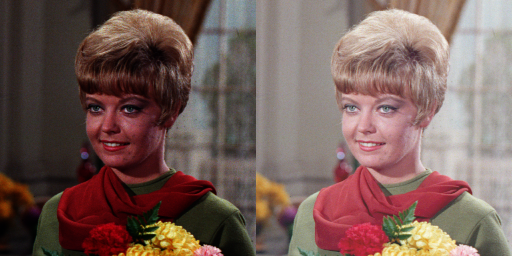

In [ ]:
print(' Gamma Correction pada citra ')
print('-----------------------------')

try:
  gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
adjusted_image = np.zeros(original.shape, dtype=np.uint8)

# Akses per pixel (pakai rumus gamma correction)
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            normalized = original[y, x, c] / 255.0
            adjusted = 255 * (normalized ** (1.0 / gamma))
            adjusted_image[y, x, c] = np.clip(adjusted, 0, 255)

# Gabungkan hasil
final_frame = cv.hconcat((original, adjusted_image))
cv2_imshow(final_frame)

Simulasi Image Depth (Quantization)
-----------------------------------


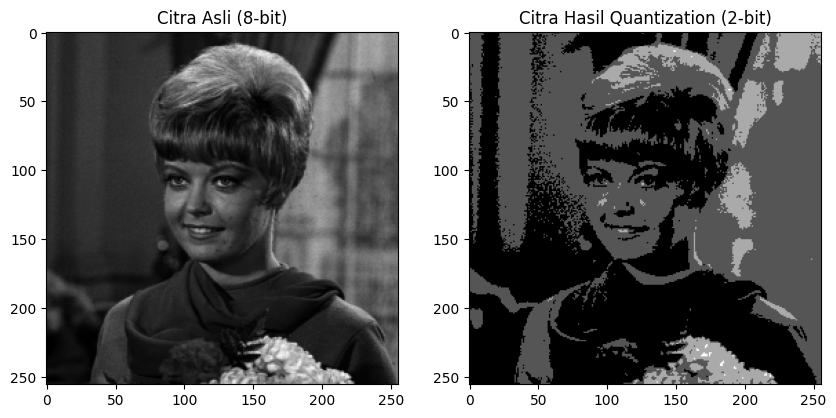

In [ ]:
print("Simulasi Image Depth (Quantization)")
print("-----------------------------------")

# Atur bit depth fix (contoh: 2-bit)
bit_depth = 2

# Baca citra grayscale
original = cv2.imread('/content/drive/MyDrive/PCVK/female.tiff', cv2.IMREAD_GRAYSCALE)

# Hitung level kuantisasi
levels = pow(2, bit_depth)
step = 255 / (levels - 1)

# Buat citra hasil kuantisasi
quantized = np.floor(original / step + 0.5) * step
quantized = np.clip(quantized, 0, 255).astype(np.uint8)

# Tampilkan hasil
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Citra Asli (8-bit)")
plt.imshow(original, cmap='gray')
plt.axis("on")

plt.subplot(1,2,2)
plt.title(f"Citra Hasil Quantization ({bit_depth}-bit)")
plt.imshow(quantized, cmap='gray')
plt.axis("on")

plt.show()


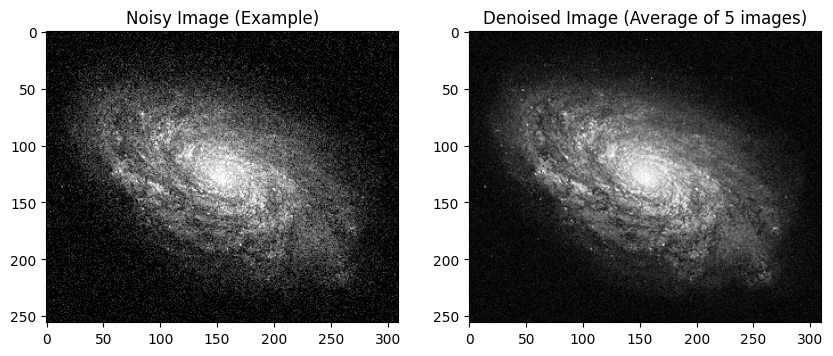

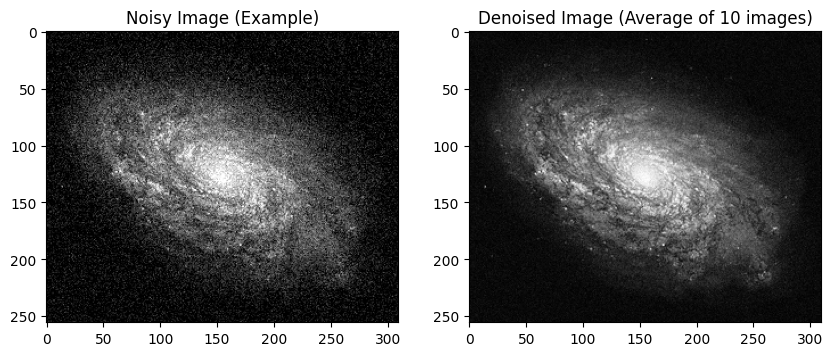

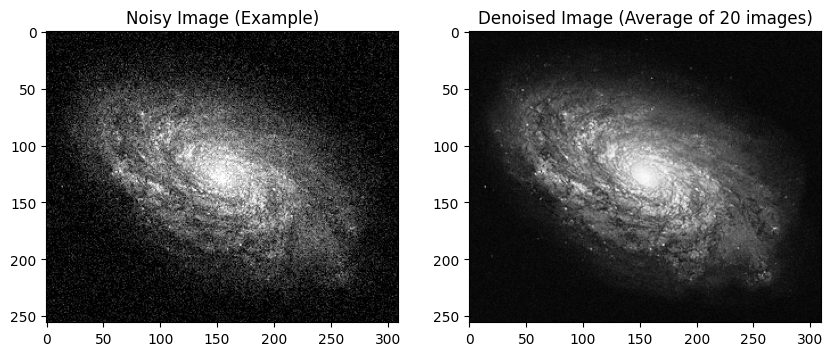

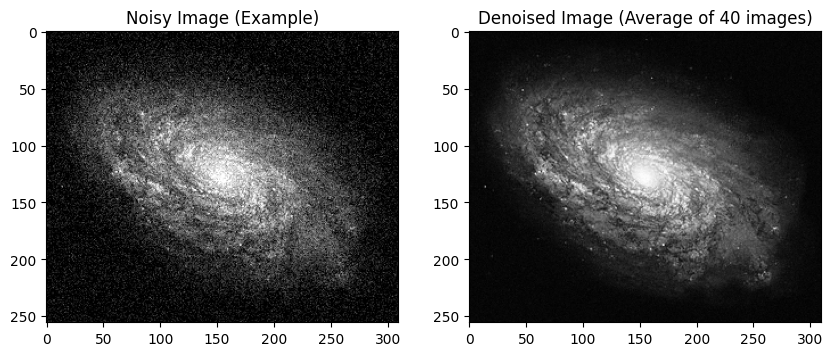

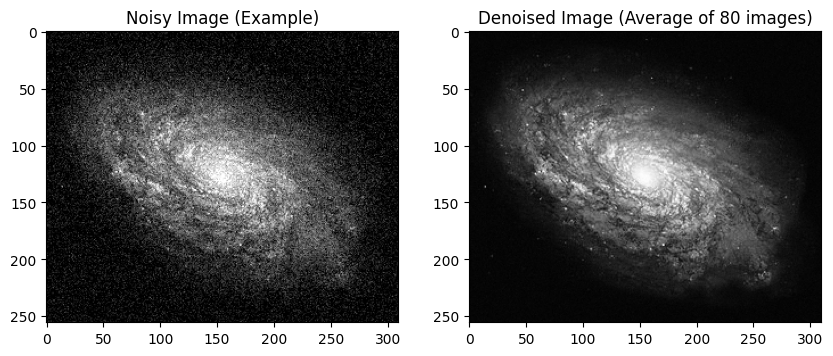

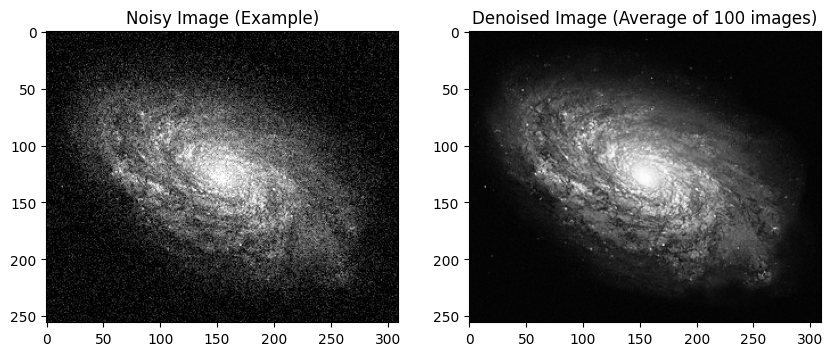

Number of averaged images: 5 - PSNR: 30.09 dB
Number of averaged images: 10 - PSNR: 30.67 dB
Number of averaged images: 20 - PSNR: 31.46 dB
Number of averaged images: 40 - PSNR: 32.25 dB
Number of averaged images: 80 - PSNR: 32.83 dB
Number of averaged images: 100 - PSNR: 32.97 dB


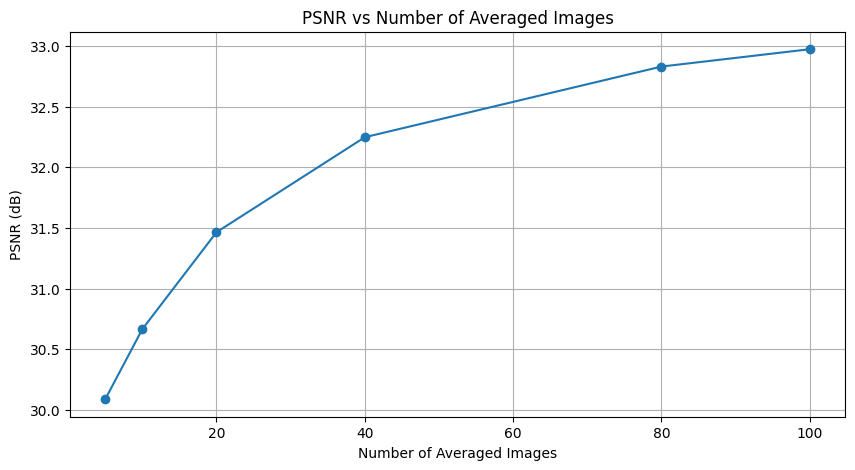

In [ ]:
def calculate_psnr(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def add_gaussian_noise(image, mean=0, sigma=25):
    gauss = np.random.normal(mean, sigma, image.shape)
    noisy = image + gauss
    return np.clip(noisy, 0, 255).astype(np.uint8)

original = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg', cv2.IMREAD_GRAYSCALE)

num_noisy_images = 100
noisy_images = [add_gaussian_noise(original) for _ in range(num_noisy_images)]

num_images_list = [5, 10, 20, 40, 80, 100]
psnr_values = []

for num_images in num_images_list:
    avg_image = np.mean(noisy_images[:num_images], axis=0).astype(np.uint8)

    psnr = calculate_psnr(original, avg_image)
    psnr_values.append(psnr)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(noisy_images[0], cmap='gray')
    plt.title('Noisy Image (Example)')
    plt.subplot(1, 2, 2)
    plt.imshow(avg_image, cmap='gray')
    plt.title(f'Denoised Image (Average of {num_images} images)')
    plt.show()

for i, num_images in enumerate(num_images_list):
    print(f"Number of averaged images: {num_images} - PSNR: {psnr_values[i]:.2f} dB")

plt.figure(figsize=(10, 5))
plt.plot(num_images_list, psnr_values, marker='o')
plt.title('PSNR vs Number of Averaged Images')
plt.xlabel('Number of Averaged Images')
plt.ylabel('PSNR (dB)')
plt.grid(True)
plt.show()

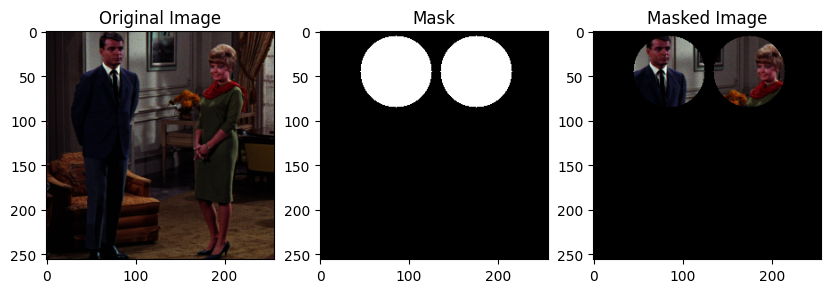

In [5]:
image = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

mask1 = np.zeros(image_rgb.shape[:2], dtype="uint8")
cv.circle(mask1, (85, 45), 40, 255, -1)  # Posisi di wajah orang kiri

mask2 = np.zeros(image_rgb.shape[:2], dtype="uint8")
cv.circle(mask2, (175, 45), 40, 255, -1)  # Posisi di wajah orang kanan

combined_mask = cv.bitwise_or(mask1, mask2)

masked_image = cv.bitwise_and(image_rgb, image_rgb, mask=combined_mask)

plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(combined_mask, cmap='gray')
plt.title('Mask')

plt.subplot(1, 3, 3)
plt.imshow(masked_image)
plt.title('Masked Image')
plt.show()

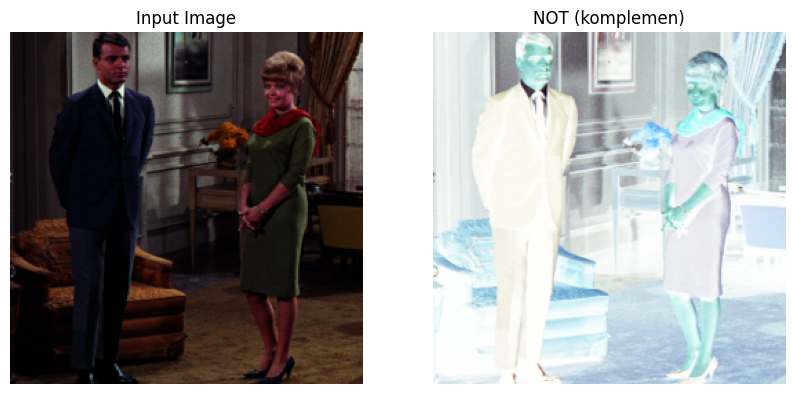

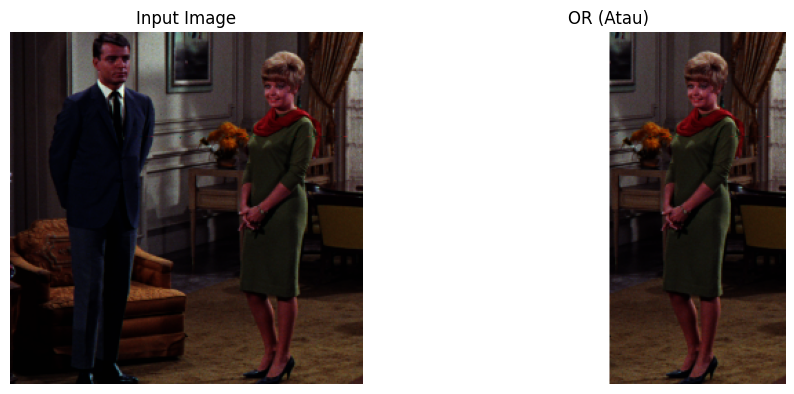

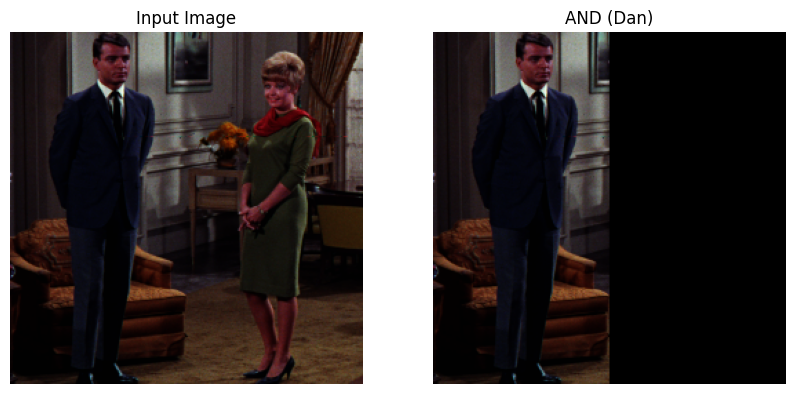

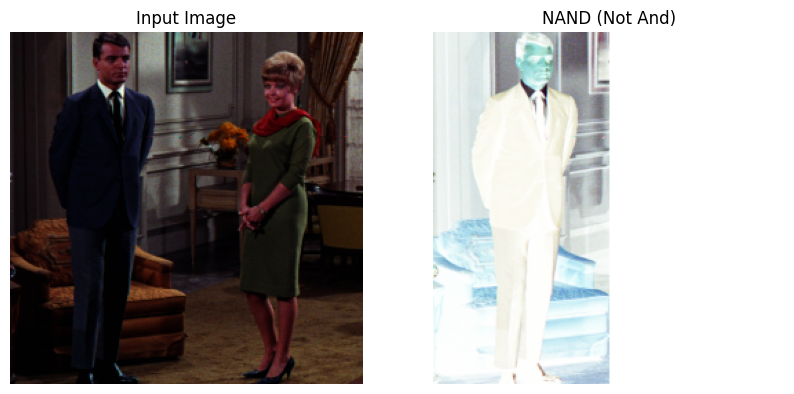

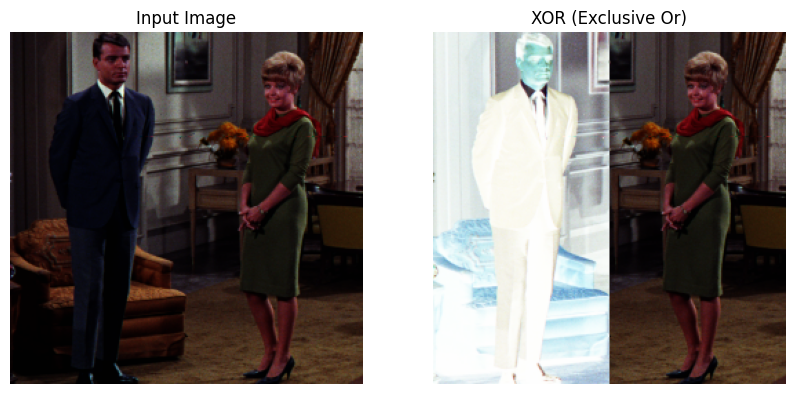

In [7]:

def show_images(title1, image1, title2, image2):
    plt.figure(figsize=(10,5))
    plt.subplot(121), plt.imshow(cv.cvtColor(image1, cv.COLOR_BGR2RGB)), plt.title(title1), plt.axis('off')
    plt.subplot(122), plt.imshow(cv.cvtColor(image2, cv.COLOR_BGR2RGB)), plt.title(title2), plt.axis('off')
    plt.show()

img = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

mask = np.zeros(img.shape, dtype=np.uint8)
mask[:, :img.shape[1]//2] = 255

not_img = cv.bitwise_not(img)
or_img = cv.bitwise_or(img, mask)
and_img = cv.bitwise_and(img, mask)
nand_img = cv.bitwise_not(cv.bitwise_and(img, mask))
xor_img = cv.bitwise_xor(img, mask)

show_images("Input Image", img, "NOT (komplemen)", not_img)
show_images("Input Image", img, "OR (Atau)", or_img)
show_images("Input Image", img, "AND (Dan)", and_img)
show_images("Input Image", img, "NAND (Not And)", nand_img)
show_images("Input Image", img, "XOR (Exclusive Or)", xor_img)